# Model Training

### 1. Load Data and Import Required Libraries

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Loading CSV File as Pandas Dataframe
df = pd.read_csv("data/StudentsPerformance.csv")

#Print top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Checking shape
df.shape

(1000, 8)

### 2. Preparing X and Y (independent and dependent variables respectively)

In [4]:
X = df.drop(columns=['math score'])

X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

### 3. Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 7), (200, 7))

In [7]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
29,female,group D,master's degree,standard,none,70,75
535,female,group C,bachelor's degree,free/reduced,completed,83,83
695,female,group D,some college,free/reduced,none,89,86
557,male,group C,master's degree,free/reduced,none,67,66
836,male,group E,high school,standard,none,64,57
...,...,...,...,...,...,...,...
106,female,group D,master's degree,standard,none,100,100
270,male,group C,bachelor's degree,standard,none,63,61
860,female,group C,associate's degree,standard,none,62,53
435,male,group C,some college,free/reduced,completed,48,53


In [8]:
y_train

29     62
535    66
695    79
557    61
836    73
       ..
106    87
270    69
860    53
435    50
102    85
Name: math score, Length: 800, dtype: int64

### 4. Transforming Data With Column Transformers

In [9]:
# Identifying numerical and categorical features
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

print("Categorical Features: ",cat_features)
print("Numerical Features: ",num_features)

Categorical Features:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')
Numerical Features:  Index(['reading score', 'writing score'], dtype='object')


In [10]:
# Creating Column Transformer with 3 types of transformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [11]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [12]:
# Transform both X_train, X_test using preprocessor

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.030791,0.434053
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930290,0.964701
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.345443,1.163694
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.176786,-0.162925
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.384363,-0.759904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.106557,2.092328
796,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.453555,-0.494580
797,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.522747,-1.025228
798,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.491438,-1.025228


In [14]:
X_train.shape, X_test.shape

((800, 14), (200, 14))

### 5. Model training with evaluation

In [15]:
def evaluate_model(true,predicted):
    r2 = r2_score(true,predicted)
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = root_mean_squared_error(true,predicted)
    return r2,mae,mse,rmse

In [16]:
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Linear Regressor": LinearRegression(),
    'K-Nearest Neighbours Regressor': KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    'Ridge Regressor': Ridge(),
    'Lasso Regressor': Lasso(),
    'Support Vector Regressor': SVR(), 
    'ElasticNet Regressor': ElasticNet(),
    'Adaboost Regressor': AdaBoostRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XgBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor()
}

model_list = []
train_r2_list = []
test_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    train_results = evaluate_model(y_train,y_train_pred)

    # Test set performance
    test_results = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance at training set:\n')
    print('- R2 Score: ',train_results[0])
    print('- Mean Absolute Error: ',train_results[1])
    print('- Mean Squared Error: ',train_results[2])
    print('- Root Mean Squared Error: ',train_results[3])

    train_r2_list.append(train_results[0])

    print("-----------------------------------------------------------------\n")

    print('Model performance at testing set:\n')
    print('- R2 Score: ',test_results[0])
    print('- Mean Absolute Error: ',test_results[1])
    print('- Mean Squared Error: ',test_results[2])
    print('- Root Mean Squared Error: ',test_results[3])
    print('\n')
    print("X"*100,'\n')

    test_r2_list.append(test_results[0])

Decision Tree Regressor
Model performance at training set:

- R2 Score:  0.9996534669718089
- Mean Absolute Error:  0.01875
- Mean Squared Error:  0.078125
- Root Mean Squared Error:  0.2795084971874737
-----------------------------------------------------------------

Model performance at testing set:

- R2 Score:  0.7157250972308522
- Mean Absolute Error:  6.635
- Mean Squared Error:  69.175
- Root Mean Squared Error:  8.31715095450359


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

Linear Regressor
Model performance at training set:

- R2 Score:  0.8743172040139593
- Mean Absolute Error:  4.266711846071957
- Mean Squared Error:  28.33487038064859
- Root Mean Squared Error:  5.323050852720514
-----------------------------------------------------------------

Model performance at testing set:

- R2 Score:  0.8804332983749565
- Mean Absolute Error:  4.214763142474849
- Mean Squared Error:  29.095169866715477
- Root Mean Squared E

### 6. Results Of Model Training

In [17]:
pd.DataFrame(list(zip(model_list,train_r2_list,test_r2_list)), columns=['Model Name','Train R2 Score','Test R2 Score']).sort_values(by=["Test R2 Score",'Train R2 Score'],ascending=False).reset_index(drop=True)

,Model Name,Train R2 Score,Test R2 Score
0,Ridge Regressor,0.874296,0.880450
1,Linear Regressor,0.874317,0.880433
2,Gradient Boosting Regressor,0.902967,0.872622
3,Random Forest Regressor,0.976522,0.853827
4,Adaboost Regressor,0.852114,0.851242
5,CatBoost Regressor,0.957509,0.850263
6,Lasso Regressor,0.807223,0.825446
7,XgBoost Regressor,0.995101,0.825046
8,K-Nearest Neighbours Regressor,0.862290,0.777305
9,Decision Tree Regressor,0.999653,0.715725


Observation:- Thus, we can choose Ridge Regressor Model as our Best Model

In [18]:
# We can also perform hyperparameter tuning on the top performing models, however it may not have significant gains in accuracy.

### 7. Building Ridge Regressor Model and Make Predictions

In [19]:
best_model = Ridge()
best_model.fit(X_train,y_train)

Ridge()

In [20]:
# Making predictions and Evaluate
y_pred = best_model.predict(X_test)
r2, mae, mse, rmse = evaluate_model(y_test,y_pred)
print('- R2 Score: ',r2)
print('- Mean Absolute Error: ',mae)
print('- Mean Squared Error: ',mse)
print('- Root Mean Squared Error: ',rmse)

- R2 Score:  0.8804500791594524
- Mean Absolute Error:  4.212526820759748
- Mean Squared Error:  29.09108645746551
- Root Mean Squared Error:  5.393615342000717


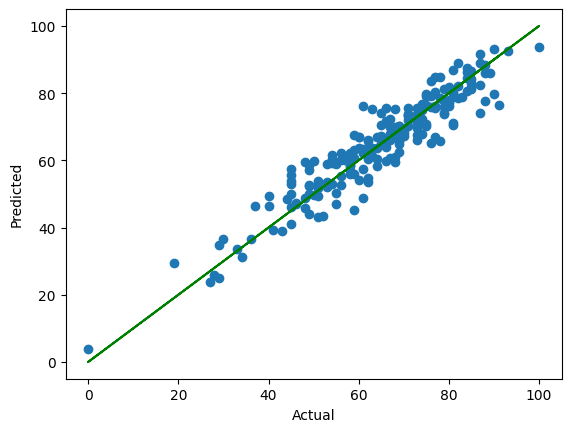

In [21]:
## Plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### 8. Difference between Actual and Predicted Values

In [22]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':(y_test-y_pred)})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.405246,14.594754
737,53,58.858827,-5.858827
740,80,76.963380,3.036620
660,74,76.777289,-2.777289
411,84,87.595216,-3.595216
...,...,...,...
408,52,43.528426,8.471574
332,62,62.163060,-0.163060
208,74,67.919865,6.080135
613,65,67.073020,-2.073020
